In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

**Описание исследования**

**Цель исследования**

Цель данного исследования заключается в выявлении причин убытков компании Procrastinate Pro+ и разработке рекомендаций для повышения эффективности маркетинговых кампаний. Мы стремимся проанализировать данные о пользователях, их поведении и рекламных расходах, чтобы понять, какие факторы влияют на привлечение и удержание клиентов, а также на рентабельность рекламы.

**Контекст**

Компания Procrastinate Pro+ работает в конкурентной сфере развлекательных приложений, где пользовательский опыт и маркетинговые стратегии играют ключевую роль в успехе. Несмотря на значительные инвестиции в рекламу, приложение сталкивается с финансовыми трудностями. Данные, доступные для анализа, включают логи посещений пользователей, информацию о заказах и данные о расходах на рекламные кампании за период с 1 мая по 27 октября 2019 года. Эти данные предоставляют уникальную возможность для глубокого анализа пользовательского поведения, эффективности рекламных каналов и выявления потенциальных проблем в стратегии привлечения клиентов.


**План исследования**

1. **Загрузка и подготовка данных:**
   - Импорт данных из файлов `visits_info_short.csv`, `orders_info_short.csv` и `costs_info_short.csv`.
   - Проведение предобработки: проверка на пропуски, дубликаты и соответствие типов данных, с особым вниманием к временным меткам.


2. **Методология анализа:**
   - Определение и описание ключевых метрик для анализа: LTV (Lifetime Value), CAC (Customer Acquisition Cost), ROI (Return on Investment), Retention Rate и Conversion Rate.
   - Разработка функций для вычисления этих метрик и построения соответствующих графиков.


3. **Исследовательский анализ данных:**
   - Составление профилей пользователей на основе регионов, устройств и рекламных каналов.
   - Анализ платящих пользователей, выявление стран и устройств с наибольшей долей платящих клиентов.
   - Визуализация и интерпретация полученных результатов.


4. **Анализ маркетинговых расходов:**
   - Подсчет общей суммы расходов на маркетинг и распределение по рекламным источникам.
   - Визуализация динамики расходов во времени и оценка среднего CAC.


5. **Оценка окупаемости рекламы:**
   - Анализ графиков LTV, ROI и CAC, проверка конверсии и удержания пользователей.
   - Оценка окупаемости рекламы по различным параметрам (устройства, страны, каналы).
   - Формулирование промежуточных выводов и рекомендаций.


6. **Заключение:**
   - Выделение причин неэффективности привлечения пользователей и предложение стратегий для улучшения ситуации.
   - Рекомендации для маркетингового отдела на основе анализа данных и полученных результатов. 

Таким образом, данное исследование направлено на комплексный анализ текущей ситуации в компании Procrastinate Pro+ и формулирование рекомендаций, которые помогут улучшить финансовые результаты и эффективность маркетинговых усилий.


### Загрузка и подготовка данных:

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**Обработка данных с сервера с информацией о посещениях сайта**

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [6]:
visits.duplicated().sum()

0

In [7]:
print(visits['Region'].unique())
print("\n")  
print(visits['Device'].unique())
print("\n")
print(visits['Channel'].unique())

['United States' 'UK' 'France' 'Germany']


['iPhone' 'Mac' 'Android' 'PC']


['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


**Описание данных**

Датасет содержит 309901 строк и 6 столбцов. Были выявлены следующие проблемы:

- **Некорректные типы данных:** Столбцы `Session Start` и `Session End` имеют некорректный тип данных, что требует приведения к правильному типу.
- **Пропуски данных:** 
  - Пропусков данных не обнаружено.
- **Формат наименований столбцов:** 
  - Наименования всех столбцов начинаются с заглавной буквы и имеют пробел, что может затруднить их использование в дальнейшем анализе.
- **Дубликаты:** 
  - Дубликаты отсутсвуют.
Планируемые действия:

1. Приведение наименований столбцов к нижнему регистру.
2. Приведение столбцов `Session Start` и `Session End` к корректному типу данных.


Эти действия необходимы для подготовки данных к дальнейшему анализу и моделированию.

In [8]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [9]:
visits[['session_start','session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime)

Проверяю, что получилось.

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Обработка данных с информацией о заказах**

In [11]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [14]:
orders.duplicated().sum()

0

**Описание данных**

Датасет содержит 40212 строк и 3 столбца. Были выявлены следующие проблемы:

- **Некорректные типы данных:** Столбец`Event Dt` имеет некорректный тип данных, что требует приведения к правильному типу.
- **Пропуски данных:** 
  - Пропусков данных не обнаружено.
- **Формат наименований столбцов:** 
  - Наименования всех столбцов начинаются с заглавной буквы и имеют пробел, что может затруднить их использование в дальнейшем анализе.
- **Дубликаты:** 
  - Дубликаты отсутсвуют.
Планируемые действия:

1. Приведение наименований столбцов к нижнему регистру.
2. Приведение столбца `Event Dt` к корректному типу данных.


Эти действия необходимы для подготовки данных к дальнейшему анализу и моделированию.

In [15]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [16]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Обработка данных с информацией о расходах на рекламу.**

In [18]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [20]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [21]:
costs.duplicated().sum()

0

In [22]:
costs['Channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

**Описание данных**

Датасет содержит 1800 строк и 3 столбца. Были выявлены следующие проблемы:

- **Некорректные типы данных:** Столбец `dt` имеет некорректный тип данных, что требует приведения к правильному типу.
- **Пропуски данных:** 
  - Пропусков данных не обнаружено.
- **Формат наименований столбцов:** 
  - Наименования столбца 'Channel' начинаются с заглавной буквы , что может затруднить их использование в дальнейшем анализе.
- **Дубликаты:** 
  - Дубликаты отсутсвуют.
Планируемые действия:

1. Приведение наименований столбцов к нижнему регистру.
2. Приведение столбца `dt` к корректному типу данных.


Эти действия необходимы для подготовки данных к дальнейшему анализу и моделированию.

In [23]:
costs.columns = costs.columns.str.lower()

In [24]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB



**На данном этапе мной было сделано следующее:**

1. **Приведение названий столбцов к удобному формату**:
   - Названия столбцов приведены к нижнему регистру и пробелы заменены на подчёркивания, чтобы упростить дальнейшую работу с данными.
   

2. **Корректировка типов данных**:
   - Привёл типы данных в столбцах с датой и временем к корректному типу `datetime`:
     - В датасете `visits` столбцы `session_start` и `session_end`.
     - В датасете `orders` столбец `event_dt`.
     - В датасете `costs` столбец `dt`.
     

3. **Проверка на пропуски и дубликаты**:
   - Проверил данные на наличие пропусков, а также явных и неявных дубликатов во всех трёх датасетах. Пропусков и дубликатов не обнаружено.
   

4. **Итоги подготовки данных**:
   - Данные были успешно подготовлены к дальнейшему анализу: проведена проверка и приведение типов данных, обработаны названия столбцов, отсутствуют пропуски и дубликаты. Теперь данные готовы для дальнейшего исследования и моделирования.


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.
        
Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [26]:

def get_profiles(sessions, orders, ad_costs):

    
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

   
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

   
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

   
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

   
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [27]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [28]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [29]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

  
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
   
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
 
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    
    def group_by_dimensions(df, dims, horizon_days):
       
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
      
        result = result.fillna(0).cumsum(axis=1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
     
        result = result.div(result['cohort_size'], axis=0)
        #
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        result['cohort_size'] = cohort_sizes

       
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [30]:
def filter_data(df, window):
  
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
def plot_retention(retention, retention_history, horizon, window=7):

    
    plt.figure(figsize=(15, 10))

    
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

  
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')


    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )


    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [32]:
def plot_conversion(conversion, conversion_history, horizon, window=7):


    plt.figure(figsize=(15, 5))


    conversion = conversion.drop(columns=['cohort_size'])

    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]


    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

 
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
  
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

  
    plt.figure(figsize=(20, 10))

   
    ltv = ltv.drop(columns=['cohort_size'])
 
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

 
    cac_history = roi_history[['cac']]

  
    roi = roi.drop(columns=['cohort_size', 'cac'])
  
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

  
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')


    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))


    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')


    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')


    ax5 = plt.subplot(2, 3, 5, sharey=ax4)

    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [34]:
profiles = get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

In [35]:
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()

print(f"Минимальная дата привлечения пользователей: {min_date}")
print(f"Максимальная дата привлечения пользователей: {max_date}")

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


In [36]:
profiles\
    .groupby('region')\
    .agg({'user_id': 'nunique', 'payer': 'mean'})\
    .reset_index()\
    .sort_values(by='payer', ascending=False)

region  user_id     payer
3  United States   100002  0.069019
1        Germany    14981  0.041119
2             UK    17575  0.039829
0         France    17450  0.037994

1. **Соединенные Штаты имеют наибольшее количество пользователей** — 100 002, что значительно превышает количество пользователей в других странах. Это указывает на то, что основная аудитория приложения находится в США.

2. **Доля платящих пользователей в США составляет 6.9%**, что является наибольшей долей среди всех стран. Это может свидетельствовать о высокой готовности пользователей из США к оплате услуг или товаров в приложении.

3. **Германия, Великобритания и Франция** имеют схожие показатели по доле платящих пользователей, с небольшими вариациями: 4.1%, 3.98% и 3.8% соответственно. Это указывает на более низкий уровень вовлеченности в платные сервисы по сравнению с США.

В целом, Соединенные Штаты являются ключевым рынком как с точки зрения количества пользователей, так и с точки зрения вовлеченности в платные сервисы, что делает их приоритетной аудиторией для компании.

In [37]:
profiles\
    .groupby('device')\
    .agg({'user_id': 'nunique', 'payer': 'mean'})\
    .reset_index()\
    .sort_values(by='payer', ascending=False)

device  user_id     payer
1      Mac    30042  0.063644
3   iPhone    54479  0.062079
0  Android    35032  0.058518
2       PC    30455  0.050468

**Платящие пользователи предпочитают Mac и iPhone:**
Устройства Mac и iPhone имеют самый высокий процент платящих пользователей, что указывает на большую склонность пользователей этих устройств совершать покупки.

**Мобильные устройства лидируют среди платящих пользователей:**
Наибольшее количество платящих пользователей пользуются мобильными устройствами, особенно iPhone, что обусловлено как высоким процентом платящих, так и большим количеством пользователей на этих устройствах.

**Пользователи PC менее склонны платить:**
PC имеет самый низкий процент платящих пользователей, что может указывать на меньшую вовлеченность или другие предпочтения пользователей этой платформы.

In [38]:
profiles\
    .groupby('channel')\
    .agg({'user_id': 'nunique', 'payer': 'mean'})\
    .reset_index()\
    .sort_values(by='payer', ascending=False)

channel  user_id     payer
1             FaceBoom    29144  0.122049
0           AdNonSense     3880  0.113402
9       lambdaMediaAds     2149  0.104700
6               TipTop    19561  0.096007
5       RocketSuperAds     4448  0.079137
7       WahooNetBanner     8553  0.052964
8              YRabbit     4312  0.038265
3         MediaTornado     4364  0.035747
2              LeapBob     8553  0.030633
4   OppleCreativeMedia     8605  0.027077
10             organic    56439  0.020553

Больше всего платящих пользователей приходят из **FaceBoom**, **AdNonSense**, **lambdaMediaAds**, **lambdaMediaAds**.

Больше всего пользователей приходят из **FaceBoom** и **TipTop**.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [39]:
costs.head(5)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [40]:
total_costs = costs['costs'].sum()
print(f'Общая сумма расходов на маркетинг: {total_costs:.2f}')

Общая сумма расходов на маркетинг: 105497.30


**Распределение трат по рекламным источникам**

In [41]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

In [42]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

In [43]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month

In [44]:
costs.head()

dt   channel  costs  week  month
0  2019-05-01  FaceBoom  113.3    18      5
1  2019-05-02  FaceBoom   78.1    18      5
2  2019-05-03  FaceBoom   85.8    18      5
3  2019-05-04  FaceBoom  136.4    18      5
4  2019-05-05  FaceBoom  122.1    18      5

**График с визуализацией динамики изменения расходов во времени по неделям и по месяцам по каждому источнику**

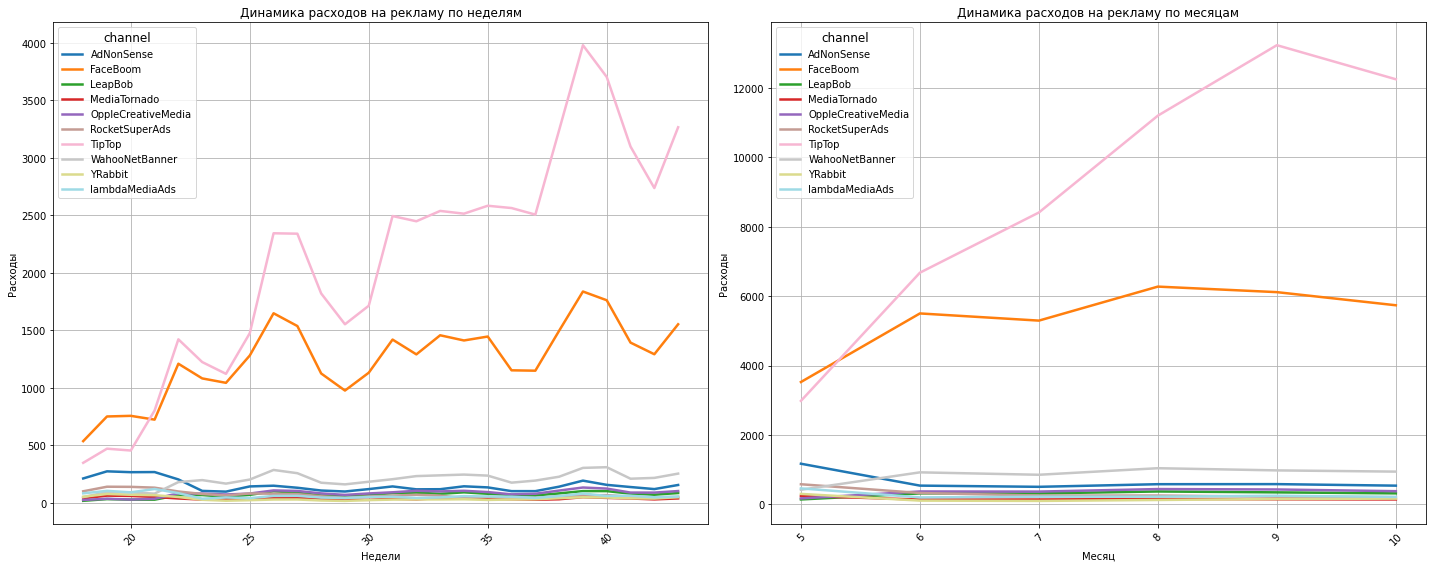

In [45]:
colors = plt.cm.tab20(np.linspace(0, 1, len(costs['channel'].unique())))

plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 1)  
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')\
    .plot(kind='line', color=colors, linewidth=2.5, ax=plt.gca(), title='Динамика расходов на рекламу по неделям', grid=True)

plt.xlabel('Недели')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='channel', fontsize=10, title_fontsize=12, loc='upper left')


plt.subplot(1, 2, 2) 
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')\
    .plot(kind='line', color=colors, linewidth=2.5, ax=plt.gca(), title='Динамика расходов на рекламу по месяцам', grid=True)

plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='channel', fontsize=10, title_fontsize=12, loc='upper left')


plt.tight_layout()
plt.show()

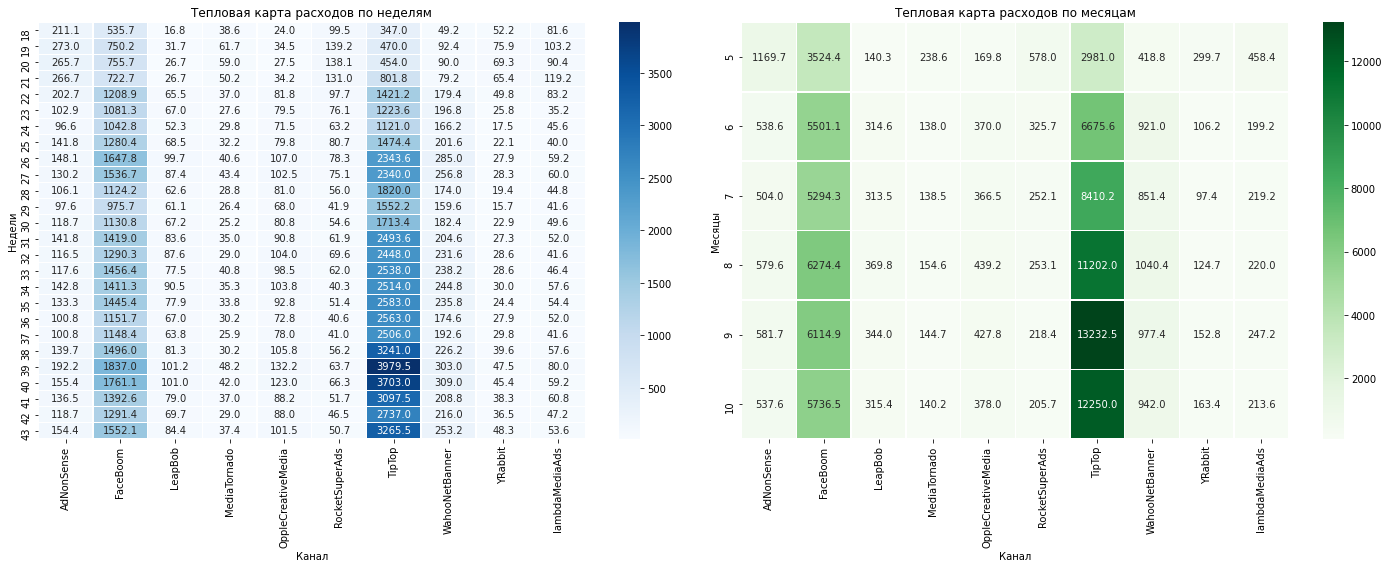

In [46]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum'),\
            annot=True, fmt=".1f", cmap="Blues", linewidths=.5)
plt.title('Тепловая карта расходов по неделям')
plt.xlabel('Канал')
plt.ylabel('Недели')

plt.subplot(1, 2, 2)
sns.heatmap(costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum'),\
            annot=True, fmt=".1f", cmap="Greens", linewidths=.5)
plt.title('Тепловая карта расходов по месяцам')
plt.xlabel('Канал')
plt.ylabel('Месяцы')

plt.tight_layout()
plt.show()

Для большинства каналов расходы остаются сравнительно низкими и стабильными, за исключением двух лидеров **TipTop** и **FaceBoom**, которые явно выделяются на фоне остальных. расходы на рекламу сильно сосредоточены на двух каналах - **TipTop** и **FaceBoom**, что может требовать пересмотра стратегии для повышения эффективности затрат.

In [47]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

                    acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172


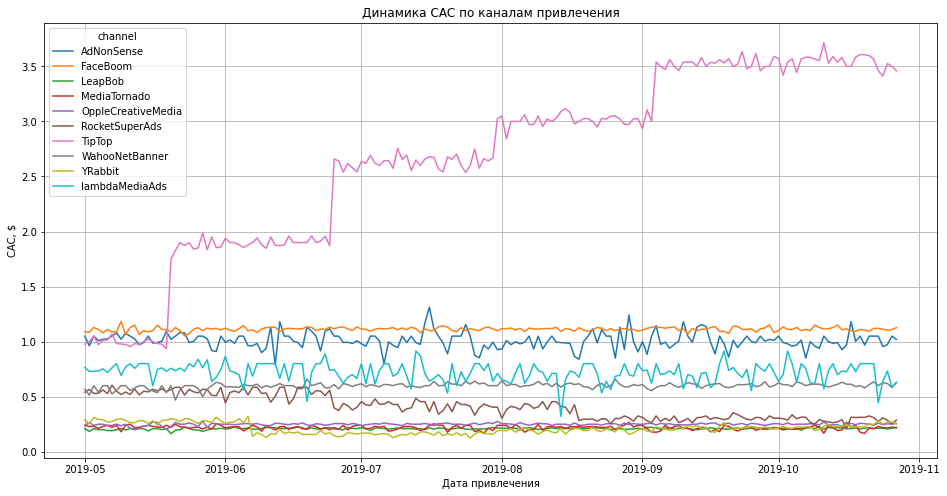

In [48]:
profiles_channel = profiles[profiles['channel'] != 'organic']


print(profiles_channel.groupby('channel')\
    .agg({'acquisition_cost': 'mean'})\
    .sort_values(by='acquisition_cost', ascending=False))


profiles_channel.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
).plot(grid=True, figsize=(16, 8))


plt.xlabel('Дата привлечения')
plt.ylabel('CAC, $')
plt.title('Динамика CAC по каналам привлечения')
plt.show()

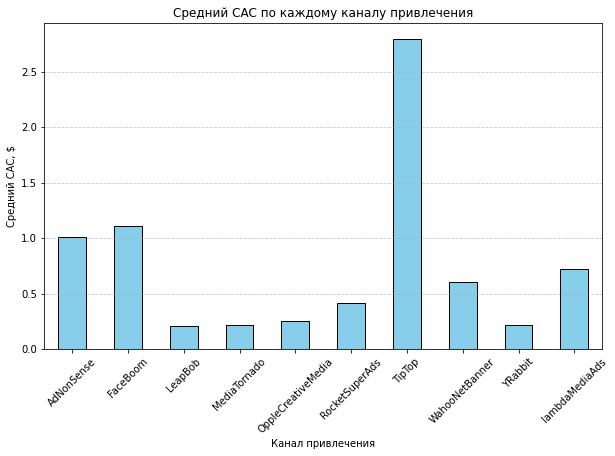

In [49]:
plt.figure(figsize=(10, 6))
profiles_channel.groupby('channel')['acquisition_cost'].mean()\
    .plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Канал привлечения')
plt.ylabel('Средний CAC, $')
plt.title('Средний CAC по каждому каналу привлечения')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Средний CAC по проекту.

In [50]:
profiles_channel['acquisition_cost'].sum()/profiles_channel['user_id'].nunique()

1.1274813239427588

**TipTop** является наиболее затратным каналом привлечения, тогда как **OppleCreativeMedia**, **YRabbit**, **LeapBob** и **MediaTornado** обеспечивают наименьшие расходы. Важно оценить эффективность каждого канала не только по затратам, но и по качеству привлеченных пользователей, чтобы оптимизировать маркетинговый бюджет.








### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [51]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

**Окупаемость рекламы**

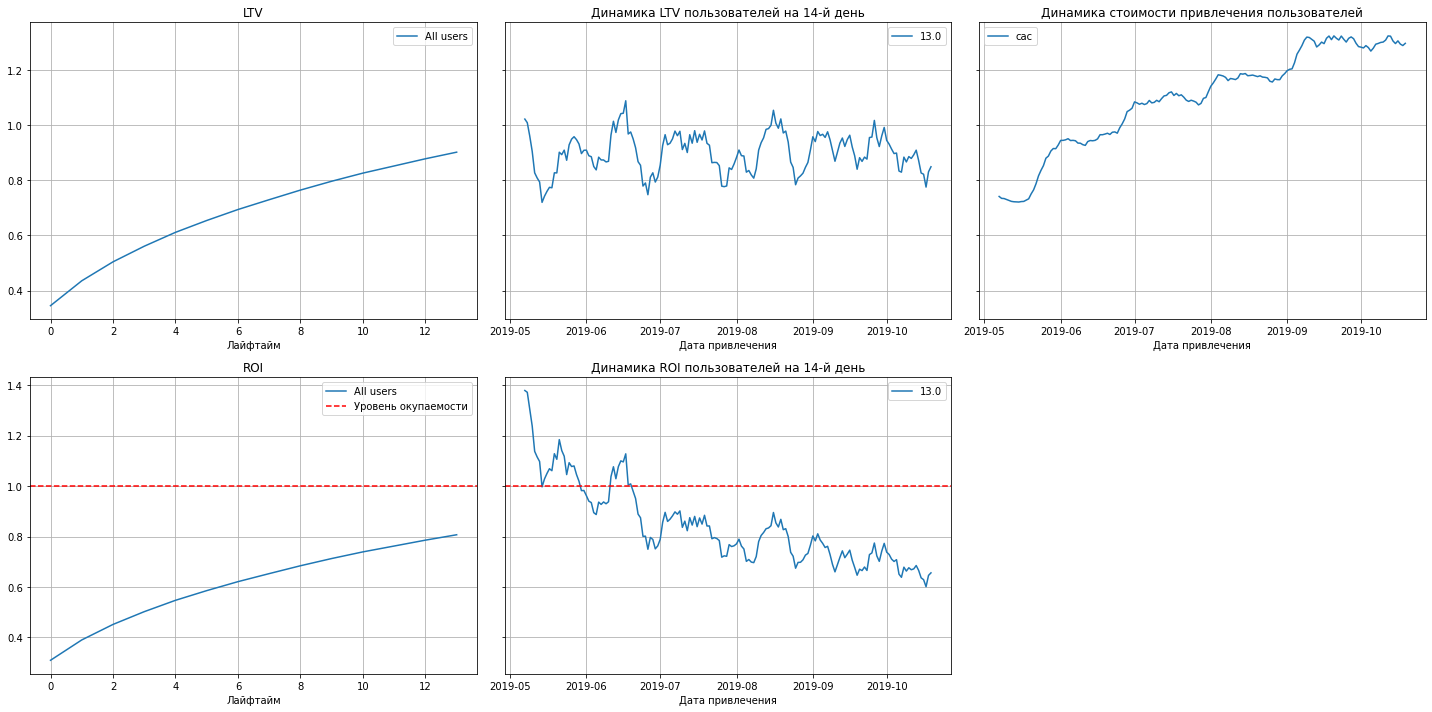

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**По графикам можно сделать такие выводы:**

Реклама не окупается. ROI в конце второй недели только подбирается к окупаемости.

CAC не стабилен. Затраты на привлечение пользователей резко вырасли со второго месяца и продолжали расти до конца отчетного периода.

LTV пользователей растет, но медленно. Это означает, что пользователи постепенно приносят доход.

Динамика RIO показывает, что данный показатель с июля ниже уровня окупаемости. Это можно связать с ростом затрат на привлечение пользователей.

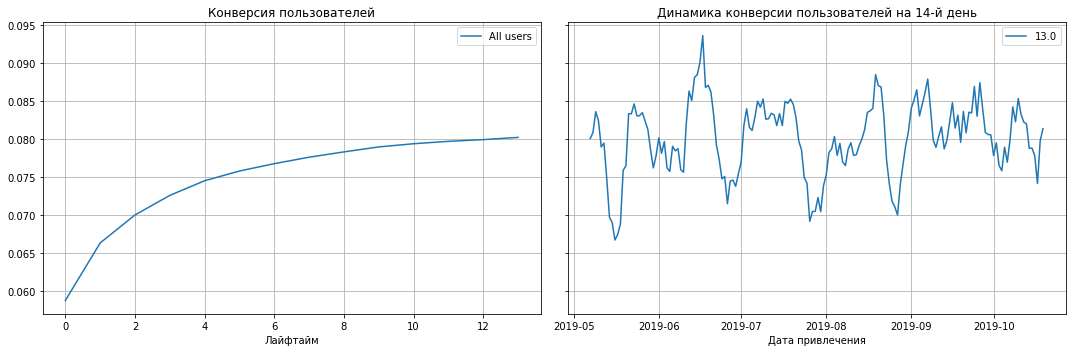

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

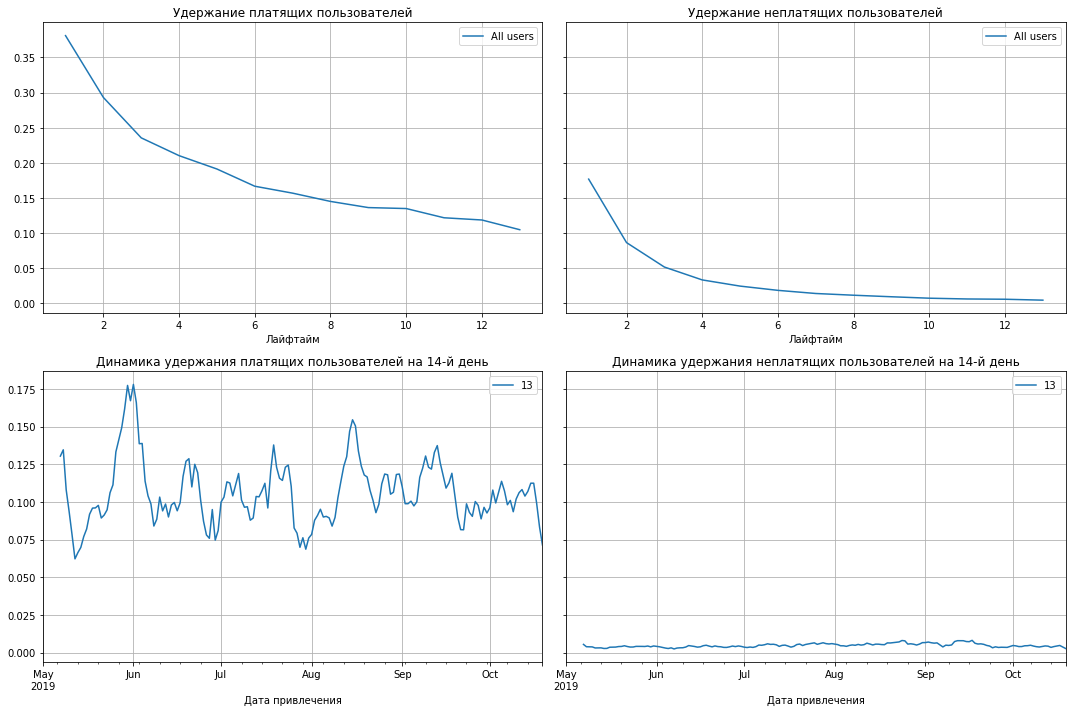

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Окупаемость рекламы с разбивкой по устройствам**

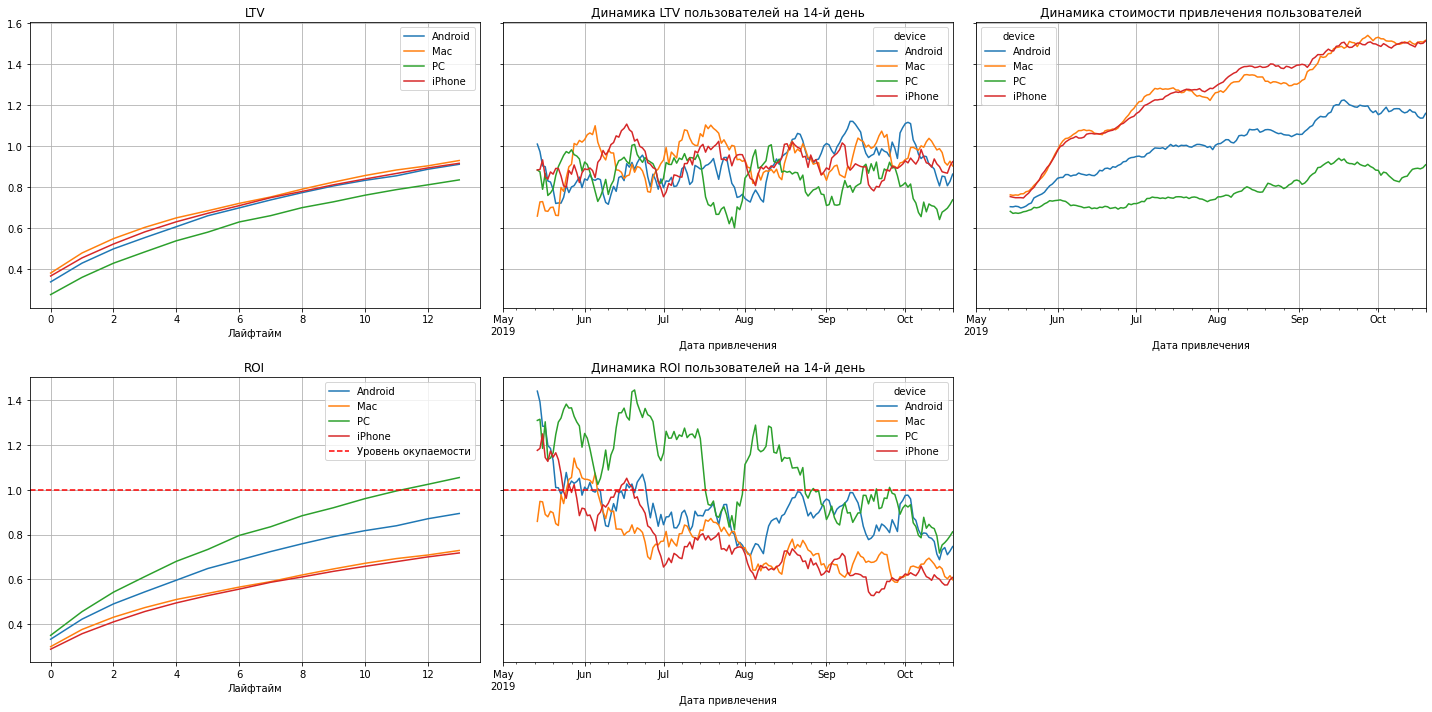

In [55]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**По графикам можно сделать такие выводы:**

Реклама окупаеся у пользователей PC и Android. Пользователи PC окупаются быстрее.

CAC не стабилен. Затраты на привлечение пользователей постепенно увеличиваются на всех устройствах. Стоимость привлечения пользователей Mac и iPhone сама высокая, пользователи PC обходятся дешевле всех.

LTV пользователей растет.

Динамика RIO показывает, что со временем привлечение перестает окупаться на всех устройствах, за исключением PC. Показатель RIO пользователей PC выше уровня окупаемости.

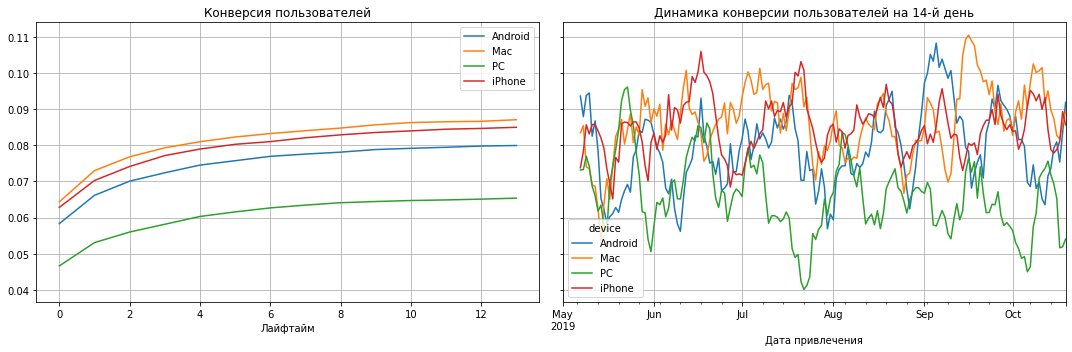

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

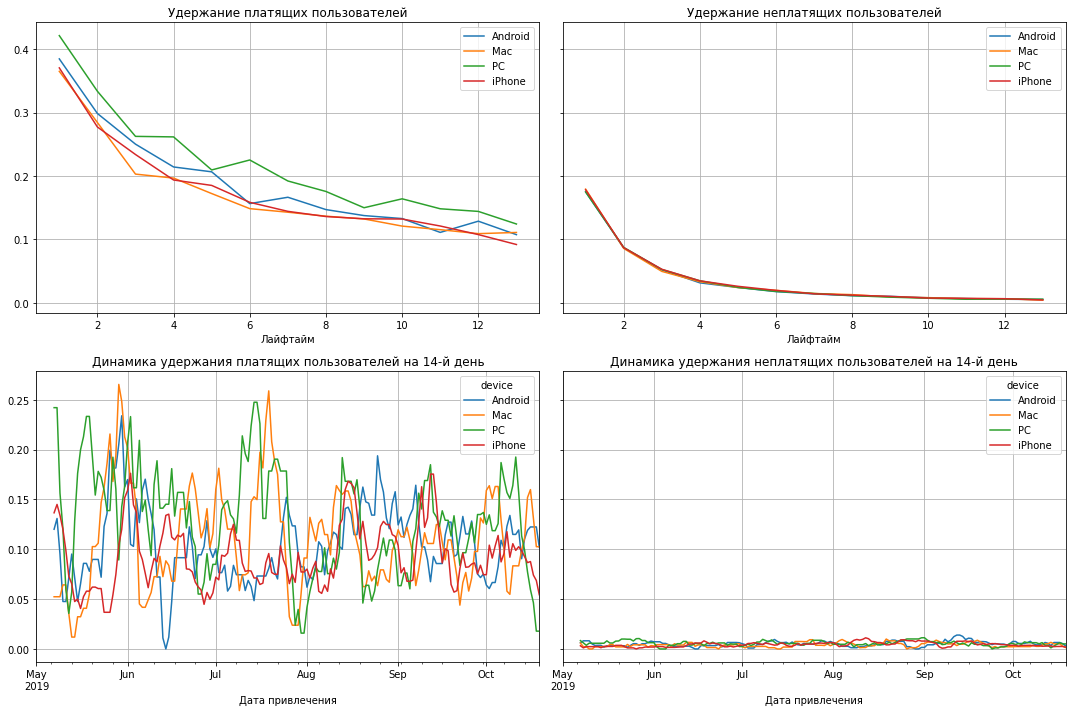

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Лучше всего конвертируются пользователи Mac, iPhone, Android. Хуже пользователи PC.
Зато пользователи PC лучше удерживаются. Можно предположить, что на PC больше конкуренции и возможности пользтваться приложениями бесплатно. Однако, если пользователь PC совершил покупку, он долше чем пользователи других устройств пользуется им.

**Окупаемость рекламы с разбивкой по регионам**

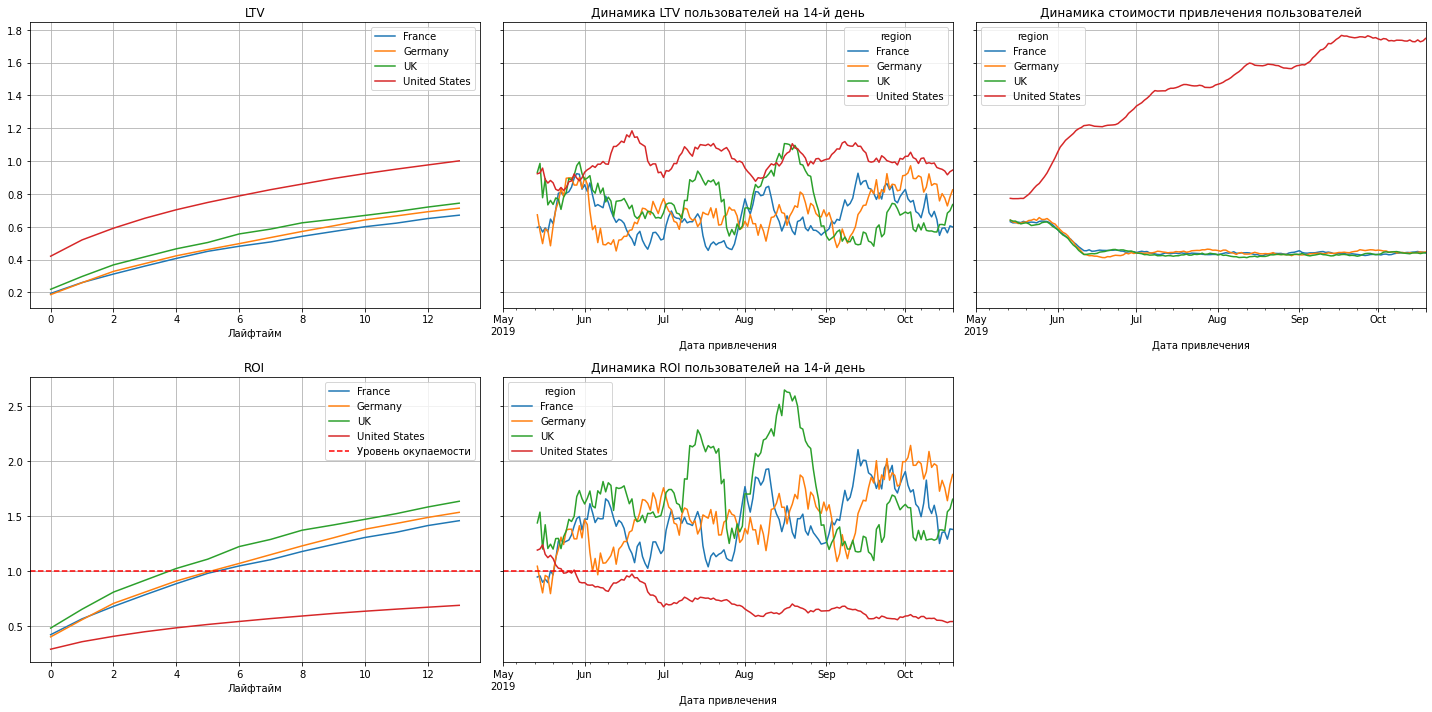

In [78]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По этим графикам видим, что реклама не окупается только в USA, стоимость привлечения так же растет только в USA.


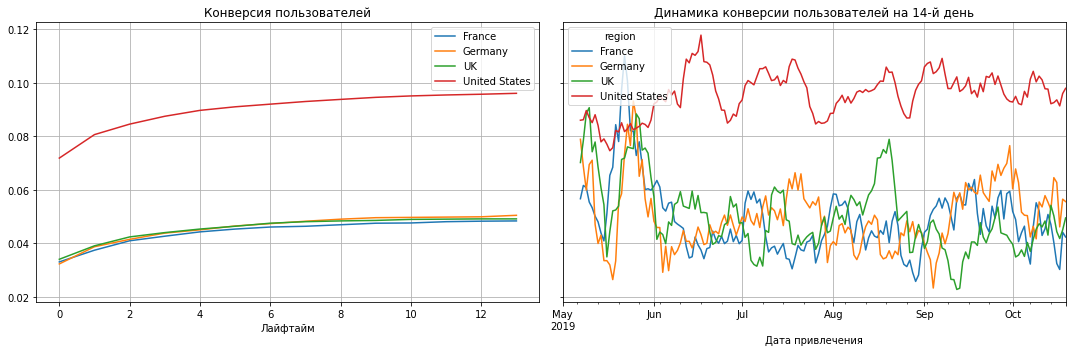

In [59]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

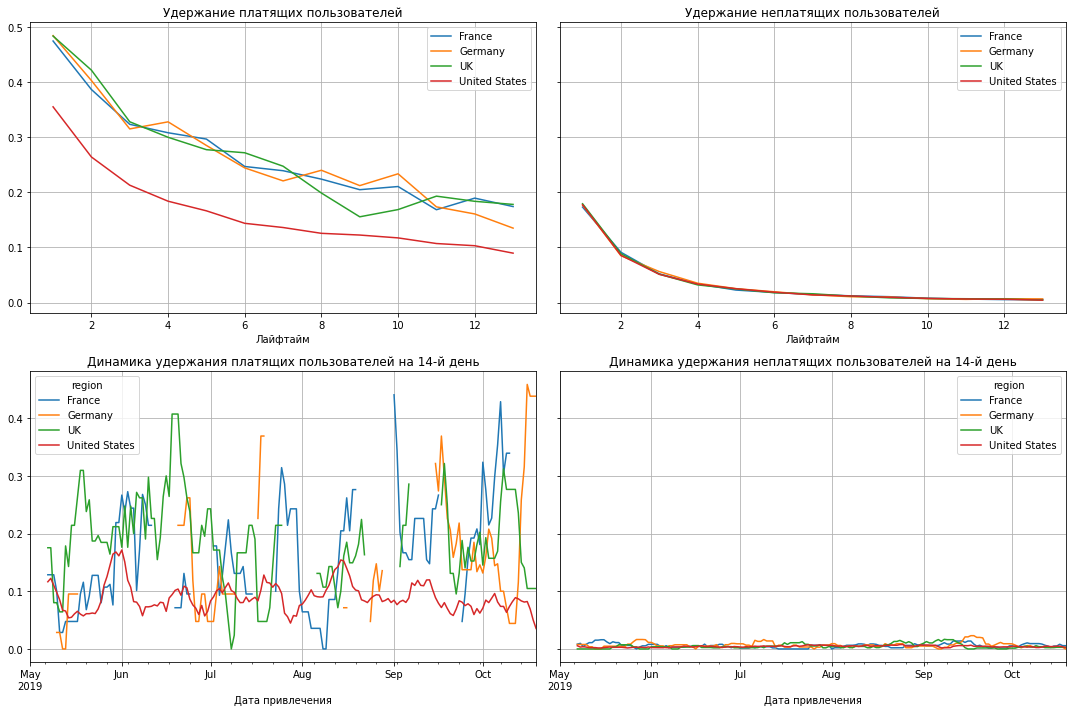

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользватели из USA лучше всех конвертируются, но отдновременно хуже всех удерживаются. Предполагаю, что из-за высокой конкуренции.

**Окупаемость рекламы с разбивкой по каналам**

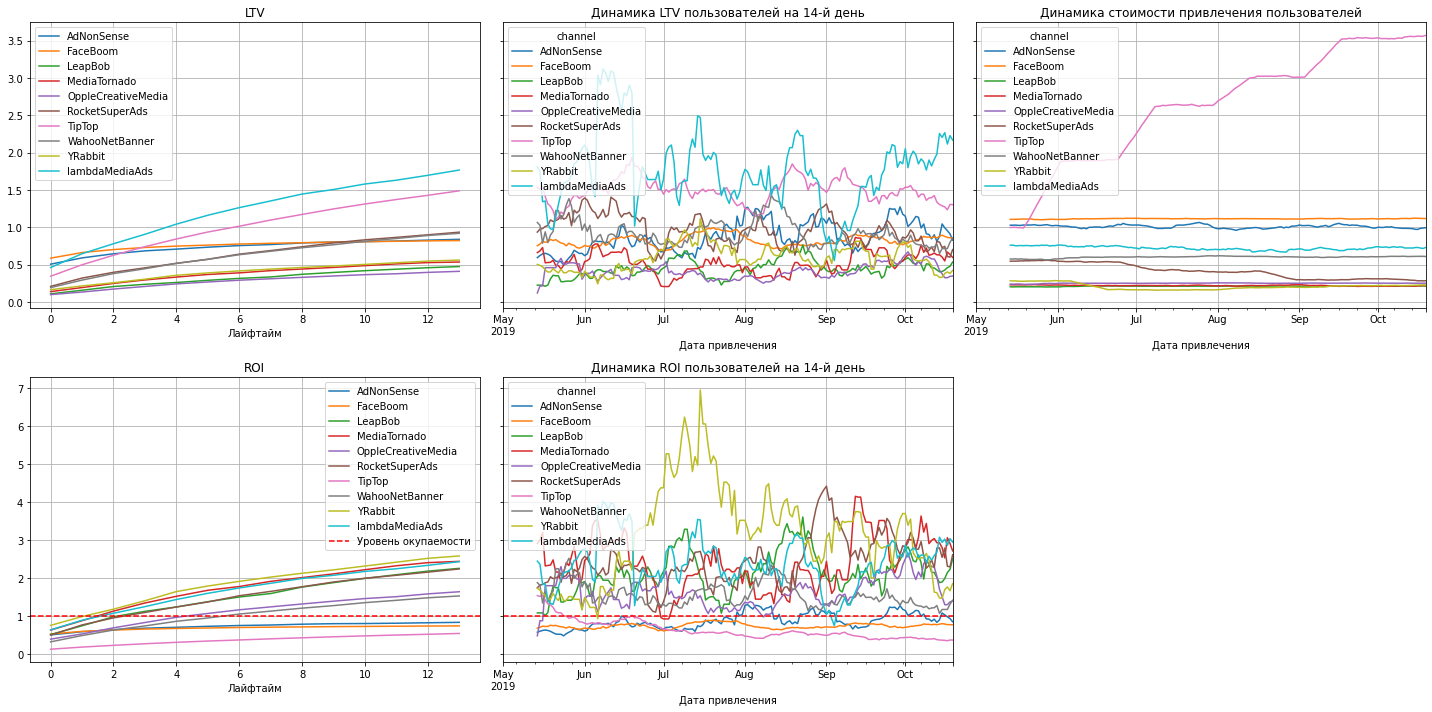

In [61]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Не окупается клиенты привлеченные из **TipTop**, **FaceBoom**, **AdNonSense**.

Можно предположить, что клиенты из **FaceBoom**, **AdNonSense** не качественные, а из **TipTop** более качесвенные, однако, из-за высокой стоимости привлечения они не окупаются.

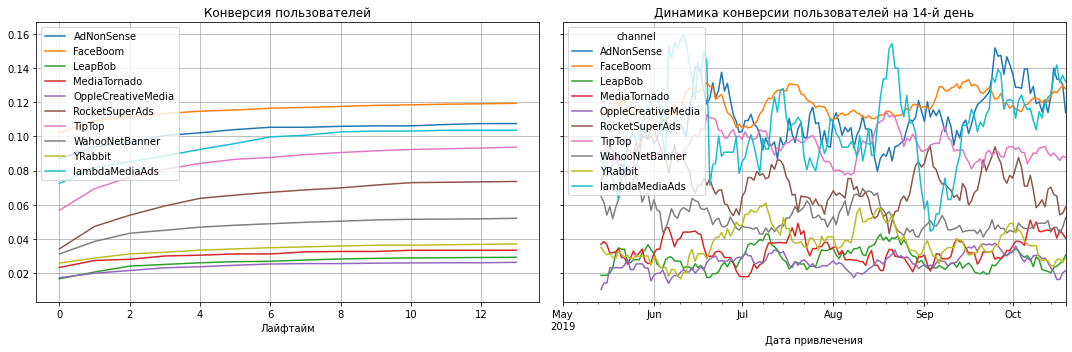

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,  window=14)

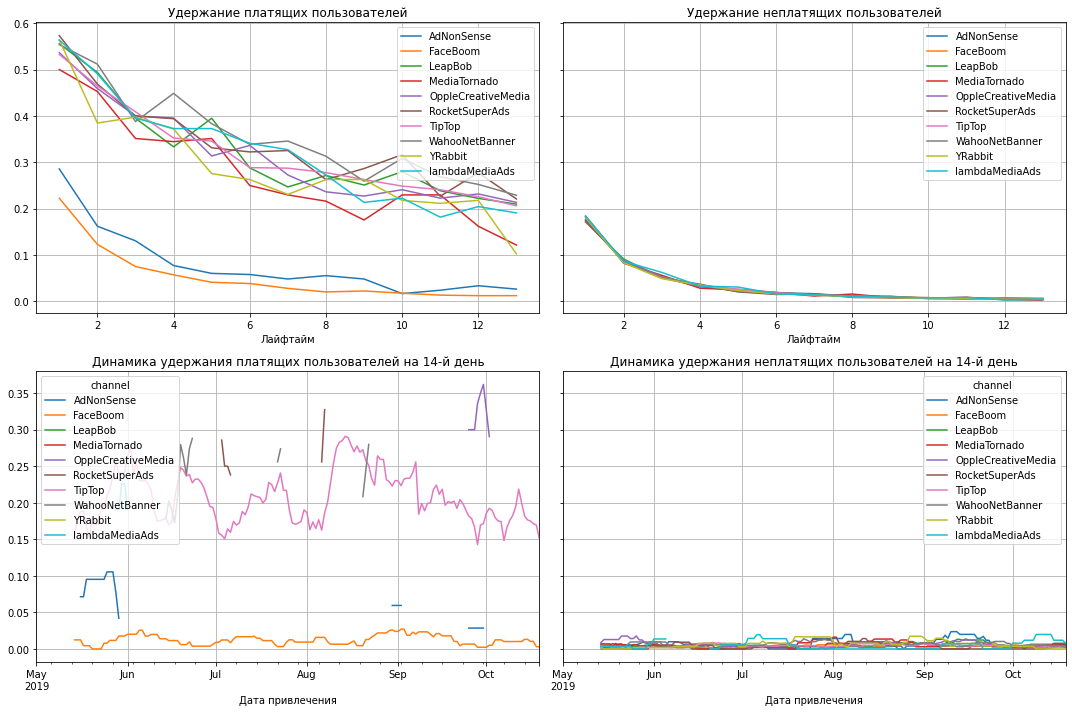

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,  window=14)

Предполагаю, что маркетинговая компаня "просела" в USA. Что бы проверить гипотезу оценю окупаемость рекламы и Европе и США.

In [64]:
profiles_usa = profiles.query('region == "United States"')

In [65]:
profiles_eur = profiles.query('region != "United States"')

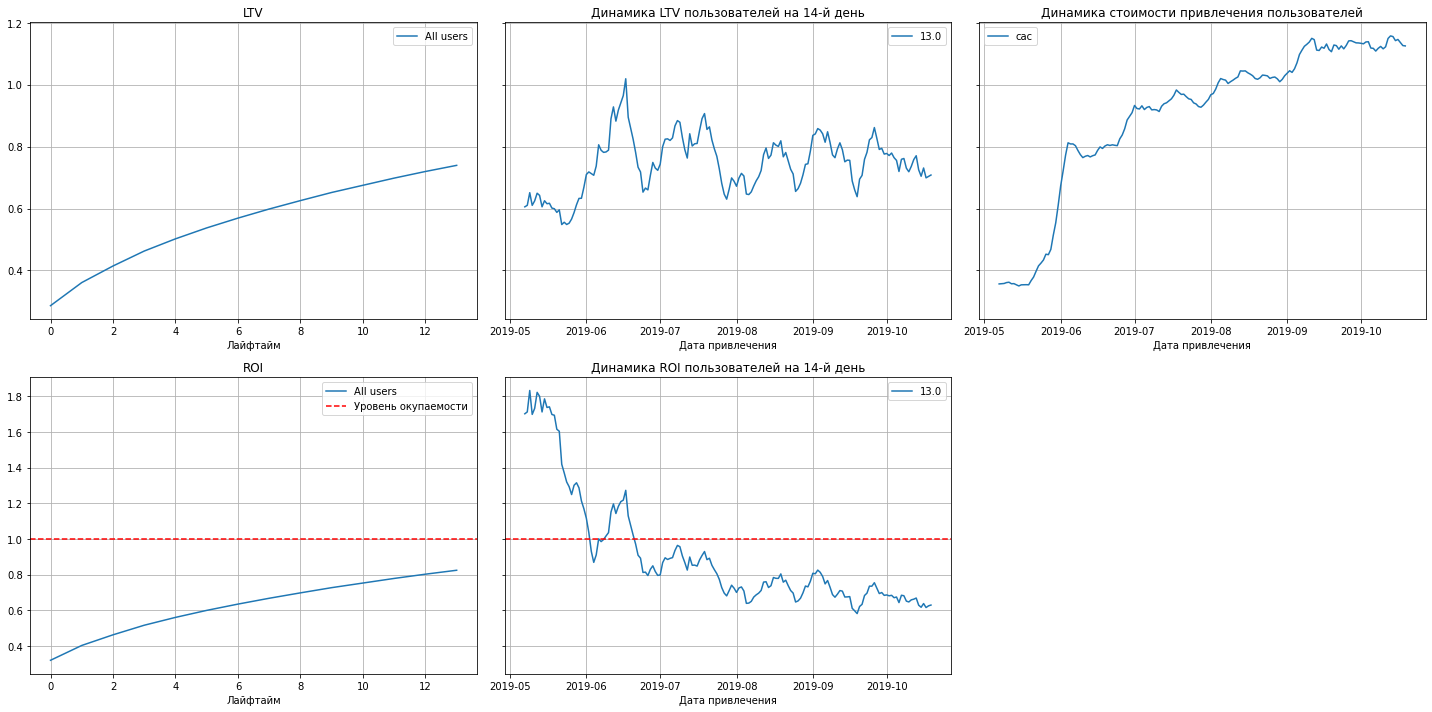

In [66]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вложения не окупаются, а затраты на привлечение все время растут.

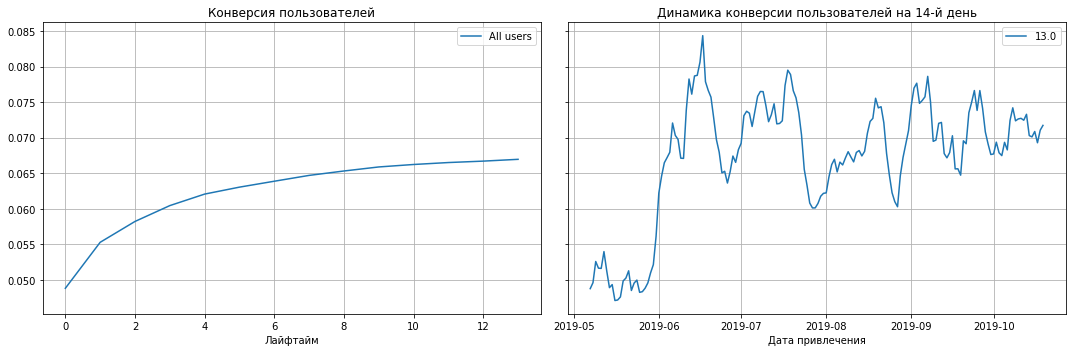

In [67]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

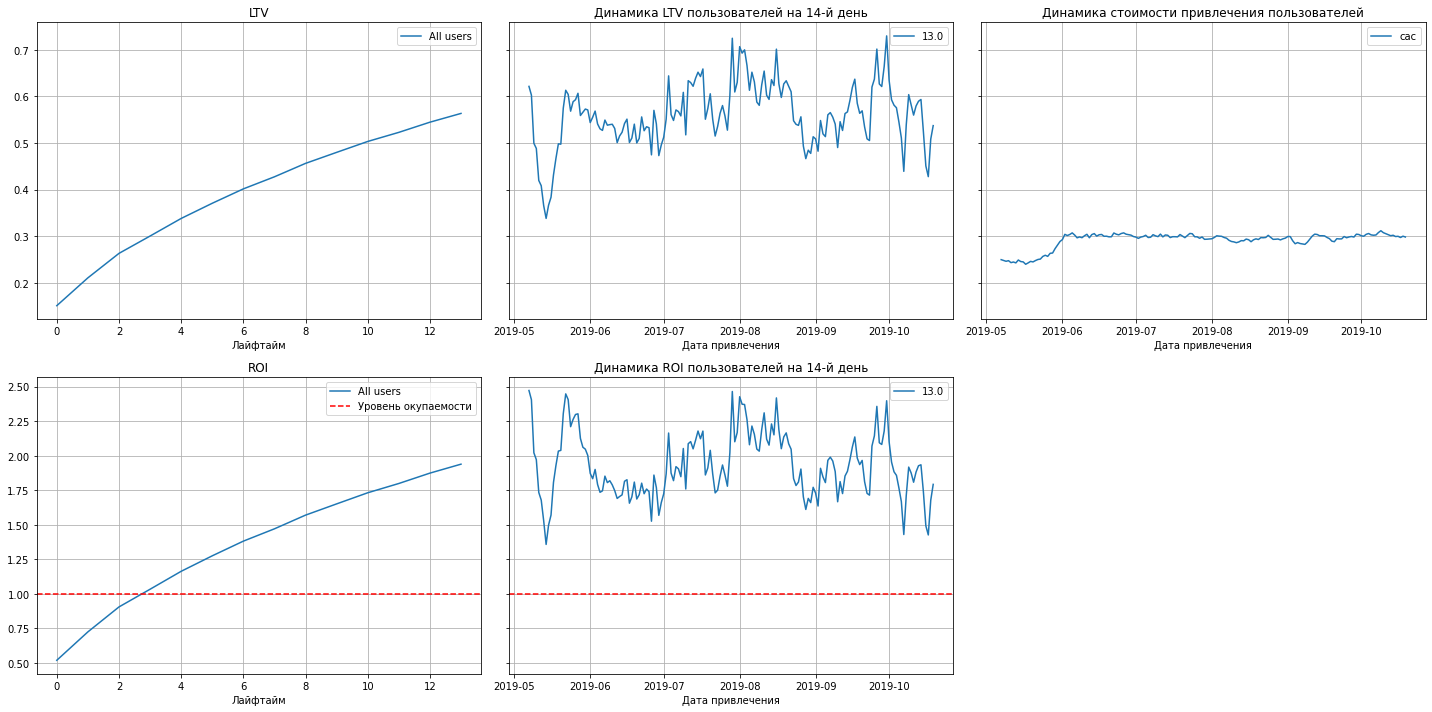

In [68]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eur, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вложения окупаются почти сразу, стоимость привлечения стабильна. Маркетинговая компания в Европе прошла успешно.

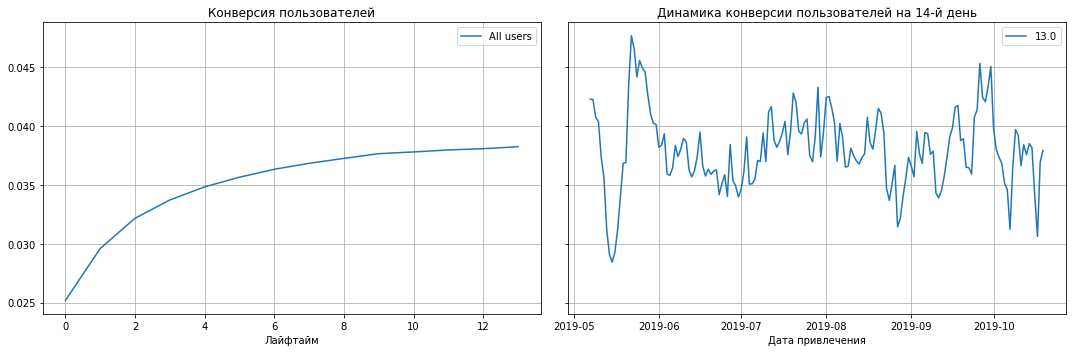

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eur, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Посмотрим окупаемость рекламы в США в разбивке по устройстам.

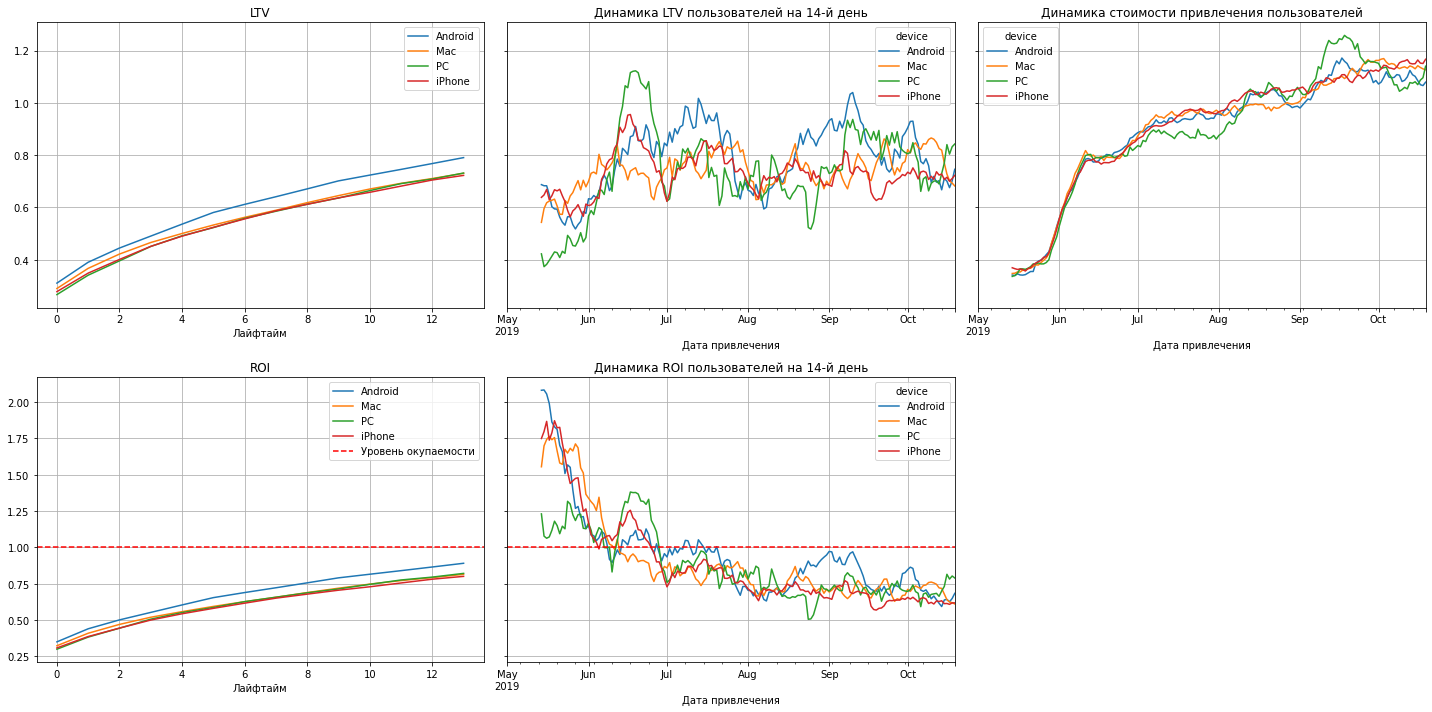

In [70]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

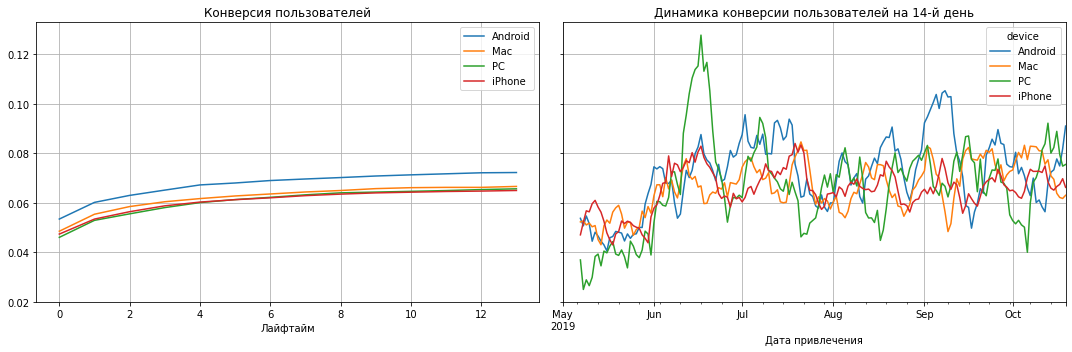

In [71]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

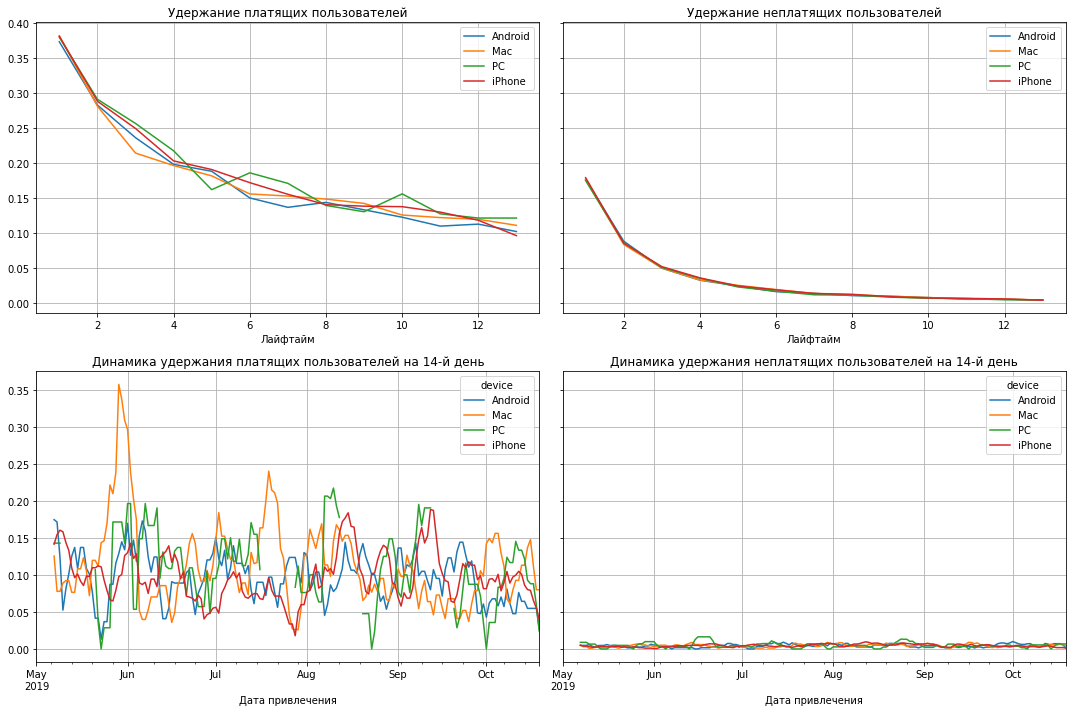

In [72]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

У всех устройств примерно одни показатели, значит дело не в них.

Пройдемся по каналам привлечения.

In [73]:
profiles_usa = profiles_usa[profiles_usa['channel'] != 'organic']

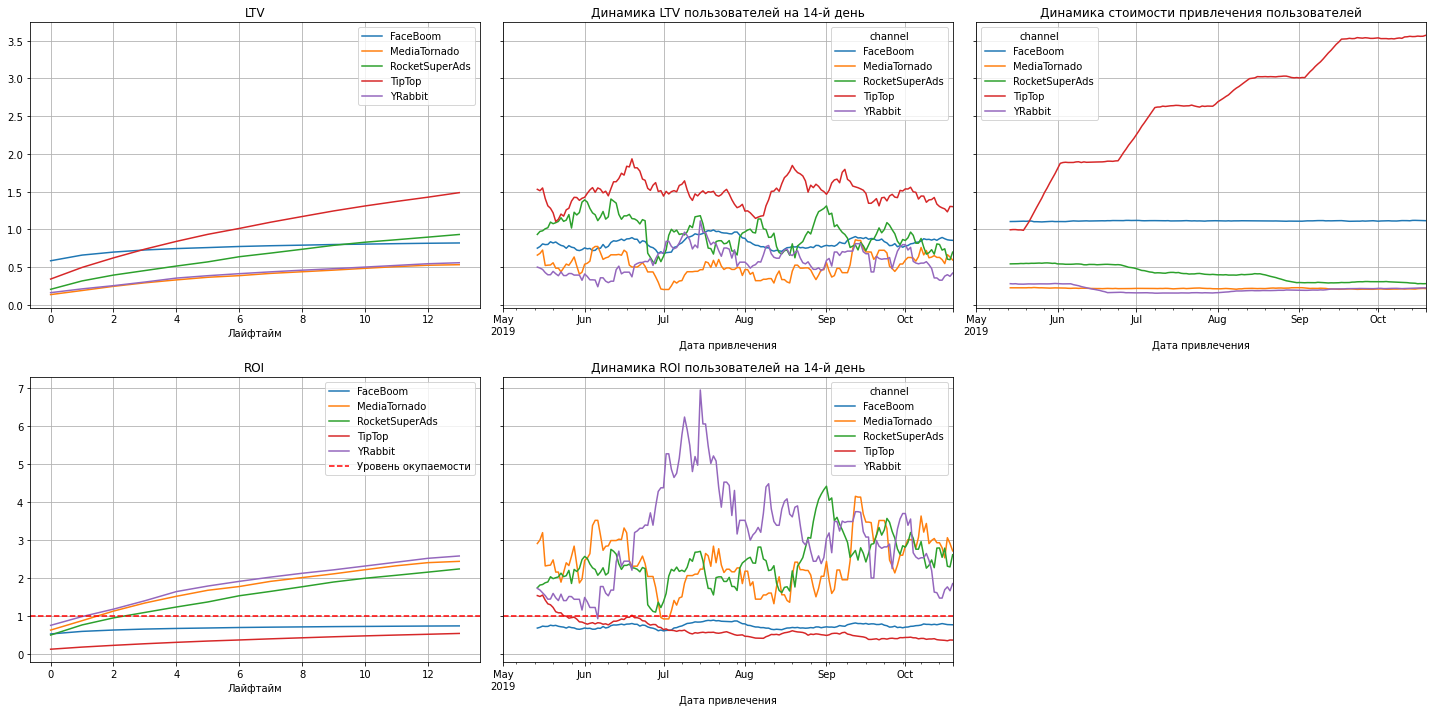

In [74]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

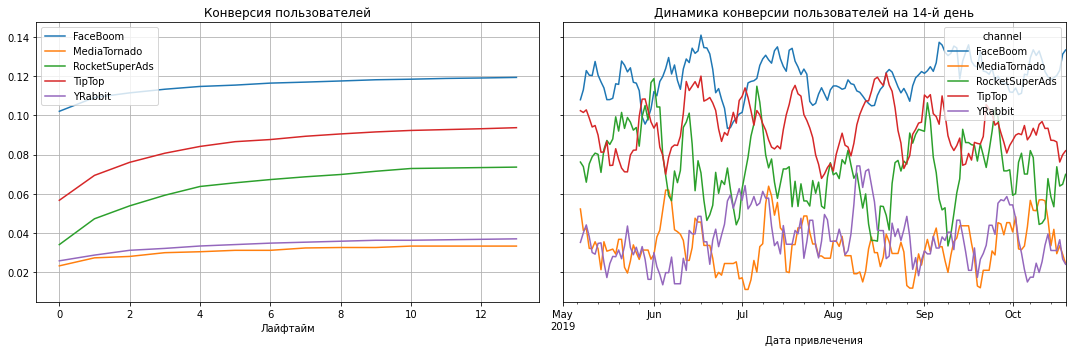

In [75]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

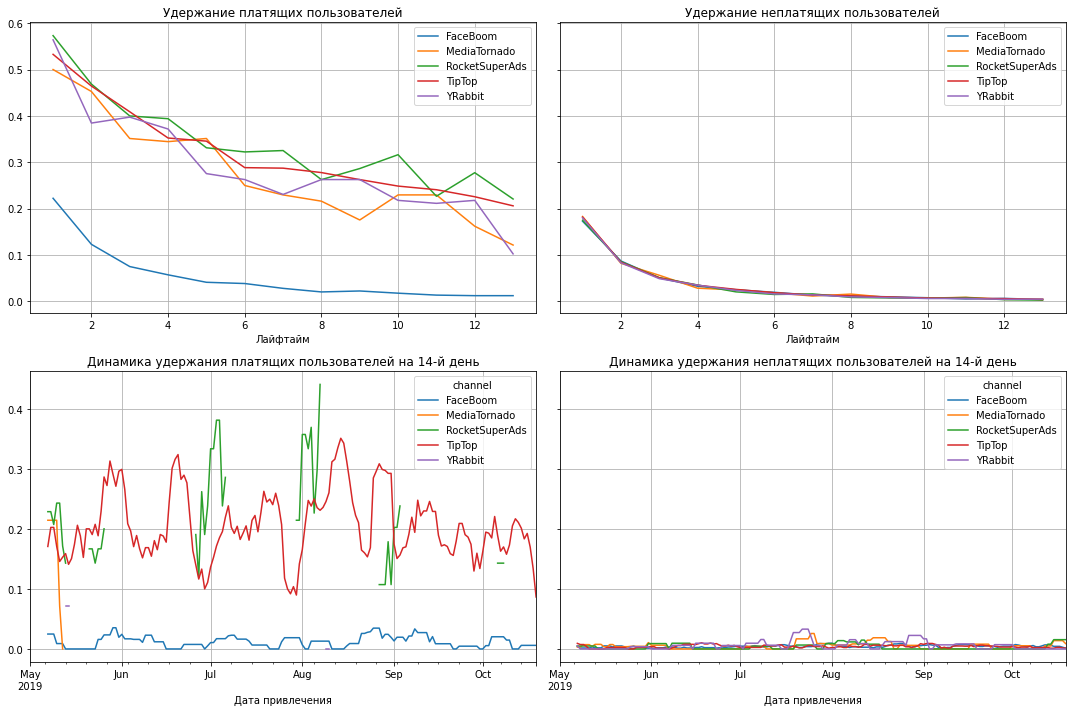

In [76]:


retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Не выходят на окупаемость клиенты, привлеченные из 2х источников **TipTop** и **FaceBoom**

У клиентов **FaceBoom** самый низкий уровень удержания клиентов, хотя самая высокая конверсия.

Стоимость привлечения **TipTop** постоянно растет из-за чего клиенты не выходят на окупаемость.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы по исследованию**
Исследование компании Procrastinate Pro+ было нацелено на анализ причин убытков и повышение эффективности маркетинговых кампаний. Были использованы данные о посещениях пользователей, заказах и расходах на рекламу за период с мая по октябрь 2019 года.

**Основные причины неэффективности привлечения пользователей**
Высокая стоимость привлечения клиентов (CAC) в США из рекламных источников **TipTop** и **FaceBoom**. (Два источника, которые генерируют значительный поток трафика)

Низкий уровень удержания клиентов из рекламного источника **FaceBoom**.



**Рекомендации для отдела маркетинга**

Оптимизация рекламного бюджета: Перераспределить бюджет в пользу более эффективных каналов, постепенно уменьшая затраты на неэффективные источники трафика.

Повышение удержания пользователей: Выяснить причины низкого уровня удержания клиентов из **FaceBoom**.
Внедрить программы лояльности, акции и персонализированные предложения для повторного вовлечения и повышения заинтересованности клиентов.

Использование A/B тестирования: Оптимизировать рекламные сообщения, изображения и таргетинг на основе данных A/B тестирования для повышения конверсии.

Улучшение сегментации:

Обратить внимание на клиентов из Европы и пользователей РС.